In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



if not os.path.exists('/Users/behnamebrahimi/Developer/MyTestRepo/Export'):
    os.makedirs('/Users/behnamebrahimi/Developer/MyTestRepo/Export')
    
# Define the FAANG company symbols
symbols = ['AAPL', 'AMZN', 'meta', 'GOOGL', 'NFLX']

# Define the start and end dates for the historical data
start_date = '2000-01-01'
end_date = '2024-04-30'

def getPrice(stockName,start_date, end_date):
    data = yf.download(tickers= stockName, start=start_date, end=end_date)
    return data

def calculate_returns(data):
    data['Daily_Return'] = data['Close'].pct_change()
    #addin montghly return
    data['Monthly_Return'] = data['Close'].pct_change(30)
    #adding weekly return
    data['Weekly_Return'] = data['Close'].pct_change(7)
    return data

In [12]:
stockPrices = []
        
# Fetch the historical prices for each symbol
for symbol in symbols:
    prices = getPrice(symbol, start_date, end_date)
    calculate_returns(prices)
    stockPrices.append(prices)
    # Create a CSV file for each stock
    folder_name = 'Export'
    filename = f"{symbol}_historical_data.csv"
    # Create the directory if it does not exist

    file_path = f"/Users/behnamebrahimi/Developer/MyTestRepo/{folder_name}/{filename}"
    prices.to_csv(file_path)

    print(f"Saved {symbol} historical data to {filename}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Saved AAPL historical data to AAPL_historical_data.csv
Saved AMZN historical data to AMZN_historical_data.csv
Saved meta historical data to meta_historical_data.csv


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Saved GOOGL historical data to GOOGL_historical_data.csv
Saved NFLX historical data to NFLX_historical_data.csv


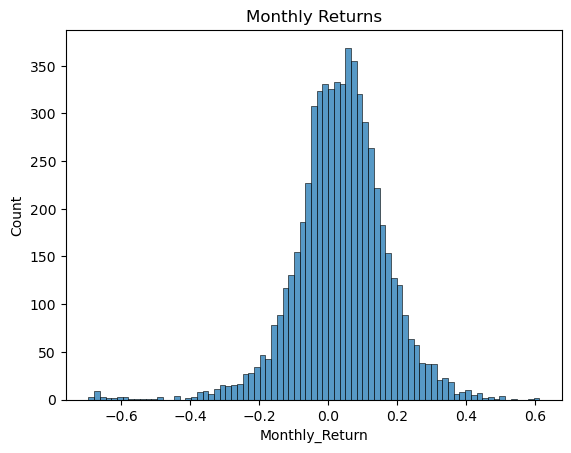

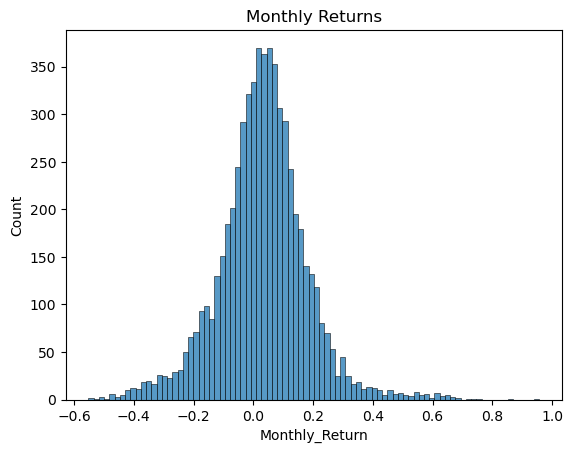

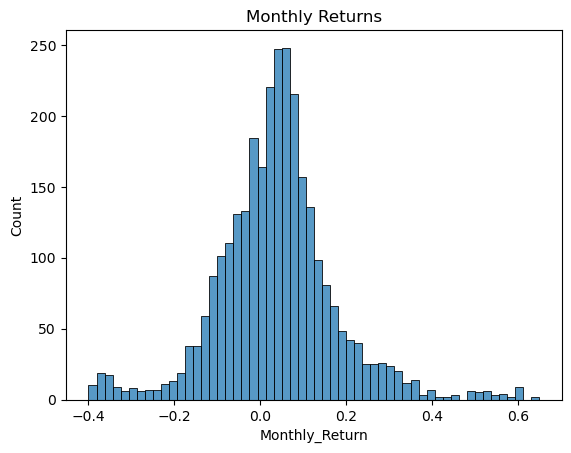

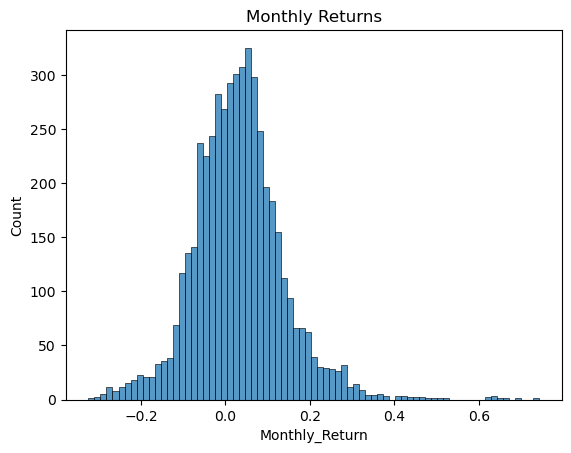

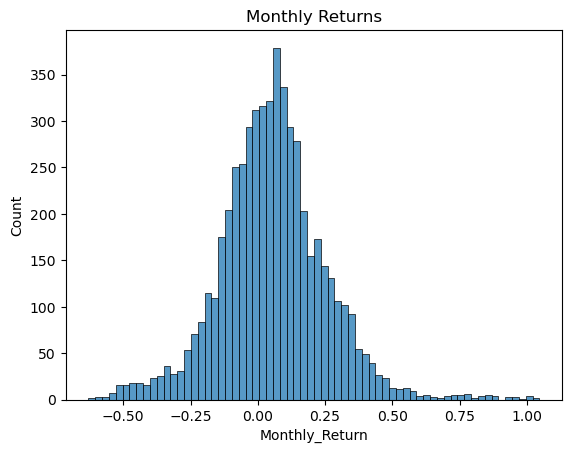

In [15]:
# iterate trough the list of stock prices and plot the monthly returns using sns
for stock in stockPrices:
    sns.histplot(stock['Monthly_Return'].dropna())
    plt.title('Monthly Returns')
    plt.show()
 

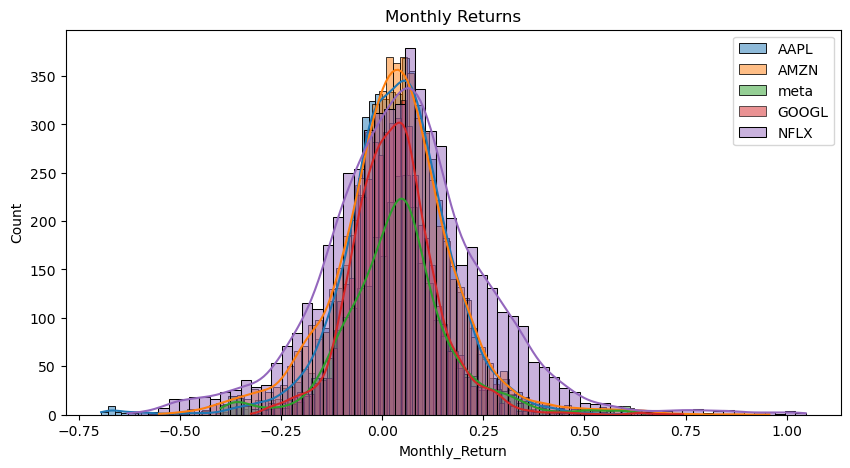

In [18]:
plt.figure(figsize=(10, 5))
for stock, symbol in zip(stockPrices, symbols):
    sns.histplot(stock['Monthly_Return'].dropna(), kde=True, label=symbol)
plt.title('Monthly Returns')
plt.legend()
plt.show()



In [19]:
!git add .
!git commit -m "Adding historical data for FAANG stocks"
!git push


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date
